# Project 2: Ames, Iowa Housing Data

#### Introduction

Hello and welcome to Notebook 1 for the Ames, Iowa [dataset](https://www.kaggle.com/emurphy/ames-iowa-housing-prices-dataset). The data dictionary can be found [here](https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf).
This project is designed to answer the problem statement listed below and more generally to explore different regression models to predict sale prices of homes in the greater Ames, Iowa area. 

This project is composed of three notebooks. This notebook, Notebook 1, is dedicated to cleaning and exploring the train data in order to get it ready for processing and modeling. Notebook 2 performs the same transformations on the data as this notebook but for the test not the train data. Notebook 3 is where the magic happens - here we will use four regression models with robust evalution of each model, in order to predict the saleprices and analyze the model's ability to make accurate predictions on other datasets. After presenting the models and evaluations, we will conclude the notebook with recommendations designed to aid the primary stakeholders identified in our problem statement. Finally, we will provide a few thoughts on further steps for this project.

#### Problem statement

Private equity-run real estate development firms have been on the rise for several decades now. These firms are often out of sync with the local communities in which they build. This can lead to discord, gentrification and a general lack of community input into the building process. 

Our aim with this project is to answer the following question: How can we empower **local** developers in Ames, Iowa and equip them with the knowledge of what consumer needs drive home sale price so that they can compete with the private-equity backed 'big dogs.'

# Cleaning the Data

## 1. Reading in datasets and importing relevant libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
cd /Users/ae-j/Documents/GA/PL/Submissions/Projects/Project2/project_2-master

/Users/ae-j/Documents/GA/PL/Submissions/Projects/Project2/project_2-master


In [3]:
train = pd.read_csv('./datasets/train.csv')

## 2. Initial examination of the data

[Data Dictionary](https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf)

First let's take a look at the variable of interest the salesprice and look at the distribution. As we can see from the histogram below, the Sale Price has a pretty substantial right tail indicating there are outliers on the upper end. The boxplot confirms this and draws specific attention to outliers over $500,000.

Second, we can take a look at the summary statistics to try to get a better sense of the data. The summary stats on Sale Price of mean ($181,469) and median ($162,500) with a min of 12,789 and max 611,657 confirms that we are indeed right skewed and that we will have to deal with the outliers.

Thirdly, I'll take a look at the correlations. Given the large number of interactions and therefore the size of the map, I created three separate maps with strong (>.5), medium (<.5 and >.3) and weak (<.1) correlations with the salesprice. These figures are convention in social sciences according to https://measuringu.com/strong-correlation/.

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.shape

(2051, 81)

### 2.1 Disribution of Sale Price - Histogram and Boxplot

Text(0.5, 1.0, 'Distribution of Sale Price')

<Figure size 720x720 with 0 Axes>

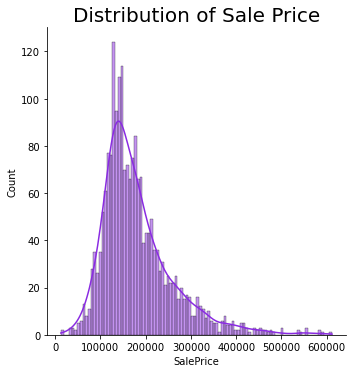

In [6]:
plt.figure(figsize=(10,10))
sns.displot(train['SalePrice'], bins = 100, color = 'blueviolet', kde = True)
plt.title('Distribution of Sale Price', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Sale Price')

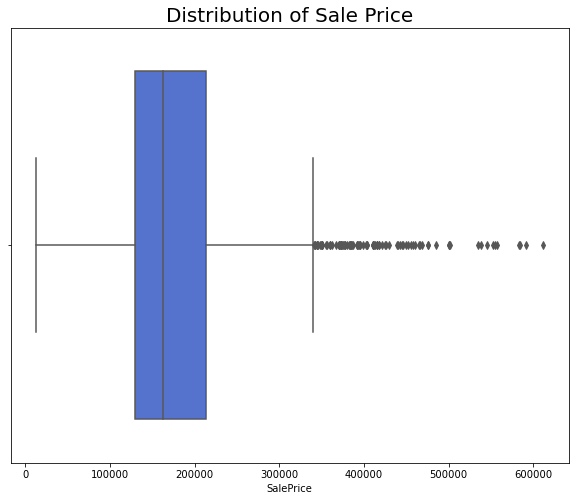

In [7]:
plt.figure(figsize=(10,8))
sns.boxplot(data = train, x= 'SalePrice', color = 'royalblue')
plt.title('Distribution of Sale Price', fontsize = 20)

### 2.3 Using the describe function

In [8]:
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


### 2.3 Creating correlation heatmap

In [10]:
## https://www.geeksforgeeks.org/python-pandas-dataframe-corrwith/ 
corr_SP = train.corrwith(train['SalePrice'])

corr_SP = pd.DataFrame(corr_SP.sort_values(0))

<AxesSubplot:>

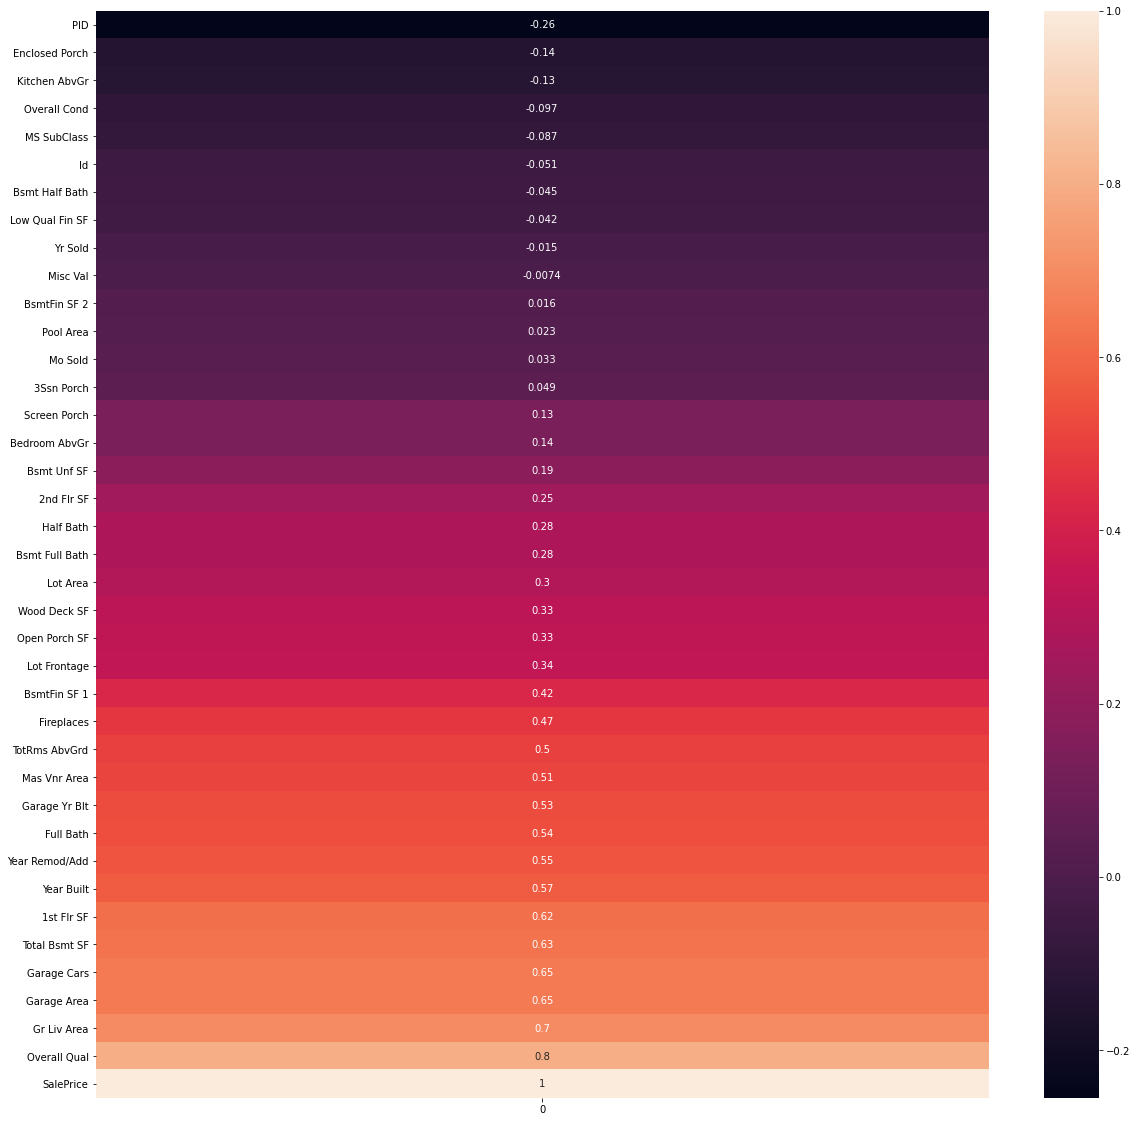

In [11]:
plt.figure(figsize= (20,20))
sns.heatmap(corr_SP, annot=True)

## 3. Handling Null Values

As we can see from the null assessment in 3.1 there are a number of variables with substantial numbers of null values in both numeric and categorical. Just dropping rows with missing values is going to remove a huge amount of data from the dataset so I took a targeted approach to missing categories based on context-specific discernment and by looking at what was best practice from data science blogs I admired. It seems that for numerical data the correct thing to do in these cases is to either use 0 or the median and for categorical data to use None. Therefore I broke the 26 columns of missing data into three categories and made changes I felt were correct. Median was use for variables with missing numerical values and for which it didn't make sense to give a 0 value (Lot Frontage) in order to prevent any outlier bias. 

### 3.1 Assessing nulls values

In [12]:
train.isnull().sum().sort_values().tail(30)

Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Overall Cond         0
BsmtFin SF 1         1
Total Bsmt SF        1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Qual           55
Bsmt Cond           55
BsmtFin Type 1      55
BsmtFin Type 2      56
Bsmt Exposure       58
Garage Type        113
Garage Yr Blt      114
Garage Qual        114
Garage Cond        114
Garage Finish      114
Lot Frontage       330
Fireplace Qu      1000
Fence             1651
Alley             1911
Misc Feature      1986
Pool QC           2042
dtype: int64

### 3.2 Handling Missing Values

In [13]:
num_nulls_zero = ['Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath', 'Bsmt Full Bath', 'Garage Cars', 'Garage Area', 'Bsmt Unf SF', 'BsmtFin SF 2', 'Total Bsmt SF', 'BsmtFin SF 1']

train[num_nulls_zero] = train[num_nulls_zero].fillna(0)

In [14]:
num_nulls_median = ['Lot Frontage']

med_lot = train['Lot Frontage'].median()

med_lot

train[num_nulls_median] = train[num_nulls_median].fillna(med_lot)

In [15]:
cat_nulls_none = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Finish', 'Garage Cond', 'Garage Qual', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Type']

train[cat_nulls_none] = train[cat_nulls_none].fillna('None')

train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,68.0,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500


## 4. Dropping and Combining Columns

81 Columns of information is really unweildly so I focused on getting these into more usable information and combining where possible to make it simpler and to remove more obvious multicolinearity. 

This was a pretty daunting task given how many columns there were. Obvious ones to consolidate were total square feet, 

### 4.1 Combining Square Feet 

In [16]:
train['Total Sqft'] = train['1st Flr SF'] + train['2nd Flr SF'] + train['Low Qual Fin SF']

train.drop(['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'], axis=1, inplace = True)

In [17]:
train.shape

(2051, 79)

### 4.2 Combining Bathrooms

In [18]:
train['Total Baths'] = train['Bsmt Full Bath'] + (train['Bsmt Half Bath']*.5) + train['Full Bath'] + (train['Half Bath']*.5)
train.drop(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'], axis=1, inplace = True)

In [19]:
train.shape

(2051, 76)

### 4.3 Deck and Porch Size Combining

In [20]:
train['Deck and Porch Sqft'] = train['Wood Deck SF'] + train['Open Porch SF'] + train['Enclosed Porch'] + train['3Ssn Porch'] + train['Screen Porch']
train.drop(['Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'], axis=1, inplace = True)

### 4.4 Age of House and Remodel

In [21]:
## Not sure what year the data is from but the latest sold year is 2010 so used 2011 for age.

In [22]:
train['House Age'] = 2011 - train['Year Built']
train.drop(['Year Built'], axis=1, inplace=True)

In [23]:
train['Remodel Age'] = 2011 - train['Year Remod/Add']
train.drop(['Year Remod/Add'], axis=1, inplace=True)

### 4.5 Basement Finished Square Foot

In [24]:
## Condensing Basement finished square foot. Pretty low correlation with Sq Ft 2 of this in the correlation table.

In [25]:
train['BasmtFin Sqft'] = train['BsmtFin SF 1'] + train['BsmtFin SF 2']
train.drop(['BsmtFin SF 1', 'BsmtFin SF 2'], axis=1, inplace=True)

In [26]:
train.shape

(2051, 71)

### 4.6 Converting Ordinal Data

In [27]:
#Credit to Jake for spurring us to use a function. Credit to andy for the map function and to me for the loop !
convert_these = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond']
for cols in convert_these:
       train[cols] = train[cols].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

## 5. Sense checking Data Types

### 5.1 Checking Data Types

In [28]:
## Code for displaying all of this came from: https://blog.softhints.com/pandas-display-all-columns-and-show-more-rows/ 
with pd.option_context("display.min_rows", 50, "display.max_rows", 100):
    display(pd.DataFrame(train.dtypes))

,0
Id,int64
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
Street,object
Alley,object
Lot Shape,object
Land Contour,object


### 5.2 Changing DataTypes

Seems like the only one to change is the MS Subclass column which should be a type of dwelling so just a string.

In [29]:
train['MS SubClass'] = train['MS SubClass'].astype('object')

## 6. Removing Outliers

Putting this here again in order to assess the correlation now

In [30]:
## https://www.geeksforgeeks.org/python-pandas-dataframe-corrwith/ 
corr_SP_2 = train.corrwith(train['SalePrice'])

corr_SP_2 = pd.DataFrame(corr_SP_2.sort_values(0))

<AxesSubplot:>

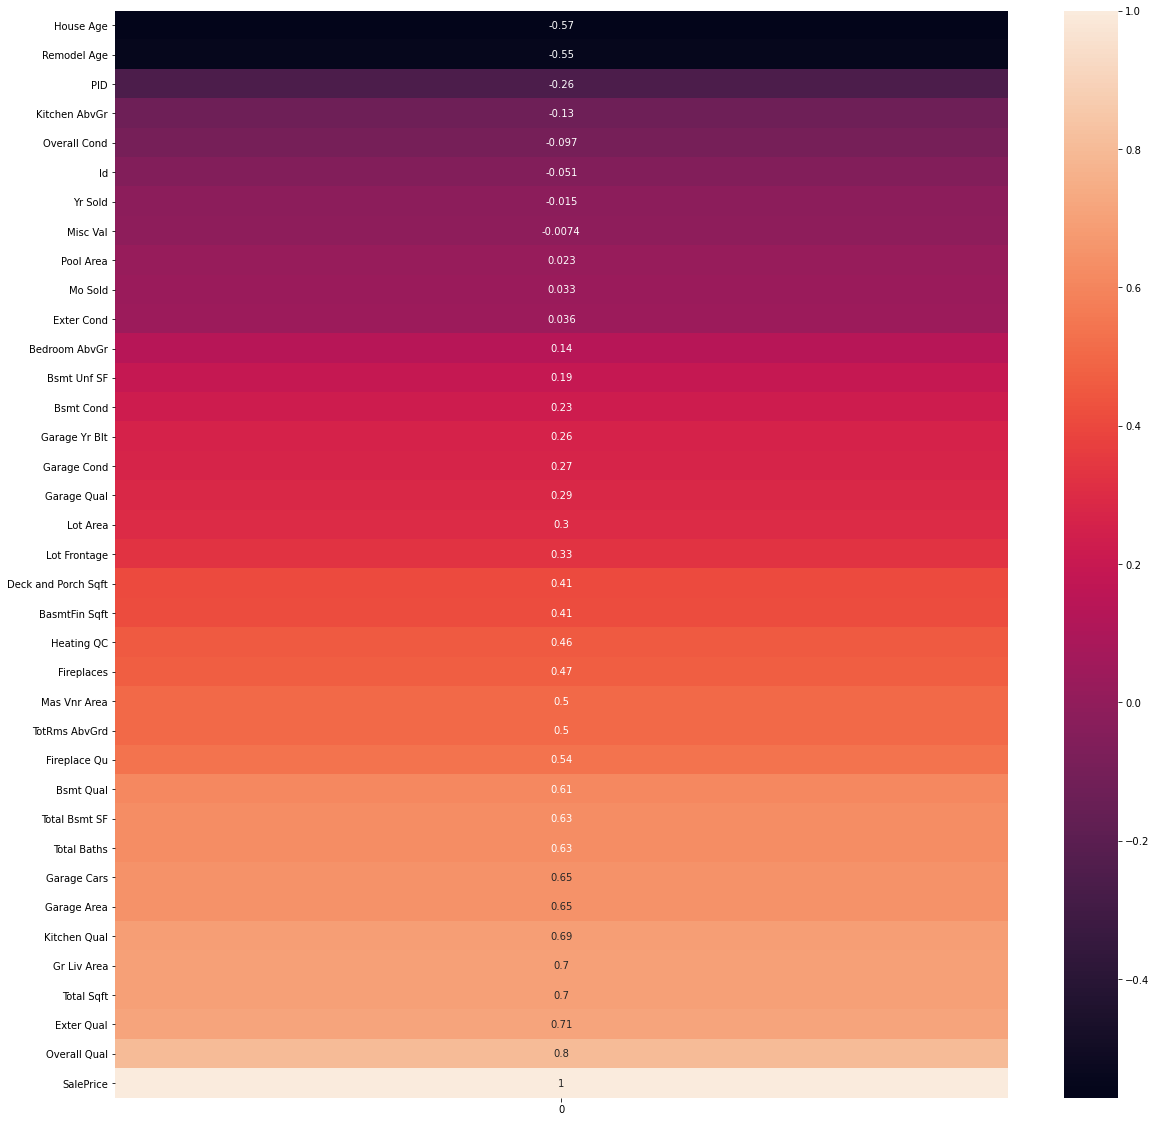

In [31]:
plt.figure(figsize= (20,20))
sns.heatmap(corr_SP_2, annot=True)

### 6.1 Establishing Outliers 

I'm guessing there is going to be large outliers on Total Sqft, Gr Living Area, and Lot Frontage in addition to SalePrice, as the histogram at the beginning of the notebook indicated. This is confirmed by looking at the following boxplots.

Text(0.5, 1.0, 'Distribution of Total Sqft')

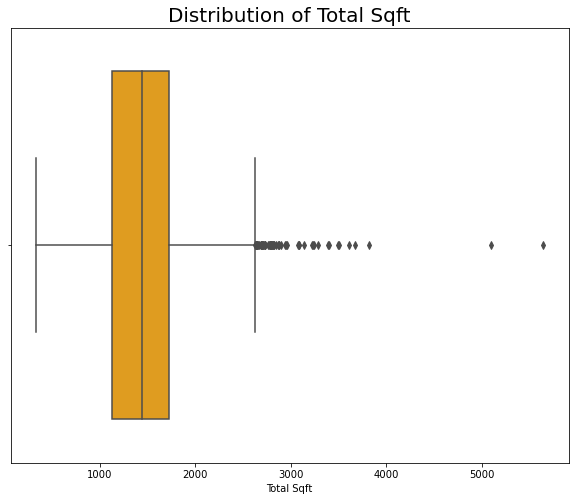

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(data = train, x= 'Total Sqft', color = 'orange')
plt.title('Distribution of Total Sqft', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Gr Liv Area')

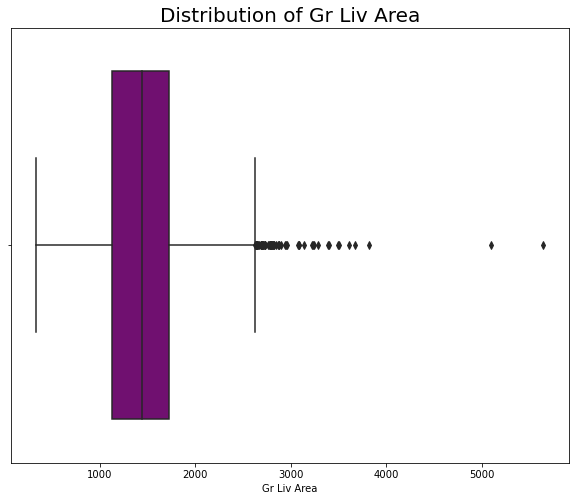

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(data = train, x= 'Gr Liv Area', color = 'purple')
plt.title('Distribution of Gr Liv Area', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Lot Frontage')

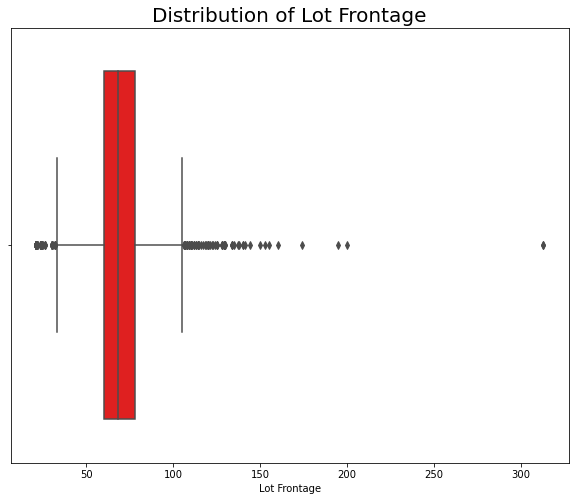

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(data = train, x= 'Lot Frontage', color = 'red')
plt.title('Distribution of Lot Frontage', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Lot Area')

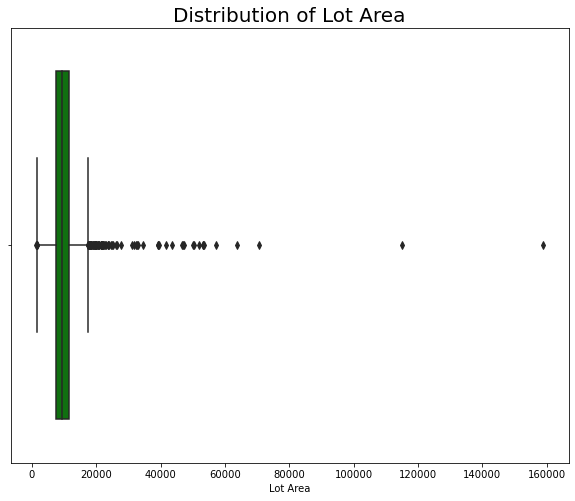

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(data = train, x= 'Lot Area', color = 'green')
plt.title('Distribution of Lot Area', fontsize = 20)

### 6.2 Removing Outliers

Here I used 3 Standard deviations away from the mean to remove outliers. I used a method learned from https://stackoverflow.com/questions/46245035/pandas-dataframe-remove-outliers

In [36]:
##Renaming certain columns
train.rename(columns = {
    'Total Sqft': 'total_sqft',
    'Gr Liv Area': 'gr_liv_area',
    'Lot Frontage': 'lot_frontage',
    'Lot Area': 'lot_area'
                       }, inplace = True)

In [37]:
train.shape

(2051, 71)

In [38]:
##Removing outliers
no_out = train[(np.abs(train.SalePrice-train.SalePrice.mean())<=(3*train.SalePrice.std()))]

no_out = train[(np.abs(train.total_sqft-train.total_sqft.mean())<=(3*train.total_sqft.std()))]

no_out = train[(np.abs(train.gr_liv_area-train.gr_liv_area.mean())<=(3*train.gr_liv_area.std()))]

no_out = train[(np.abs(train.lot_frontage-train.lot_frontage.mean())<=(3*train.lot_frontage.std()))]

no_out = train[(np.abs(train.lot_area-train.lot_area.mean())<=(3*train.lot_area.std()))]

In [39]:
no_out.head()

,Id,PID,MS SubClass,MS Zoning,lot_frontage,lot_area,Street,Alley,Lot Shape,Land Contour,...,Mo Sold,Yr Sold,Sale Type,SalePrice,total_sqft,Total Baths,Deck and Porch Sqft,House Age,Remodel Age,BasmtFin Sqft
0,109,533352170,60,RL,68.0,13517,Pave,None,IR1,Lvl,...,3,2010,WD,130500,1479,2.5,44,35,6,533.0
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,4,2009,WD,220000,2122,3.5,74,15,14,637.0
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,1,2010,WD,109000,1057,2.0,52,58,4,731.0
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,4,2010,WD,174000,1444,2.5,100,5,4,0.0
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,3,2010,WD,138500,1445,2.0,59,111,18,0.0


In [40]:
type(no_out)

pandas.core.frame.DataFrame

## 7. Dropping Unnecessary Columns

Probably could have dropped these earlier in order to save work... utilities are almost all same except one with no sewer. Condiition 2 almost all Norm. Roof Mtl almost all compshg. Exterior 2nd almost all same as Exterior 1st. Heating almost all GasA, some GasW. Land Slope seems inconsequential. House Style is going to be colinear with house sqft and probably more accurate. Garage cars and garage area likely multicolinear.

In [41]:
no_out.drop(['Pool QC','Pool Area', 'Misc Val', 'Utilities', 'Condition 2', 'Roof Matl', 'Exterior 2nd', 'Heating', 'Land Slope'], axis = 1, inplace=True)

/Users/ae-j/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

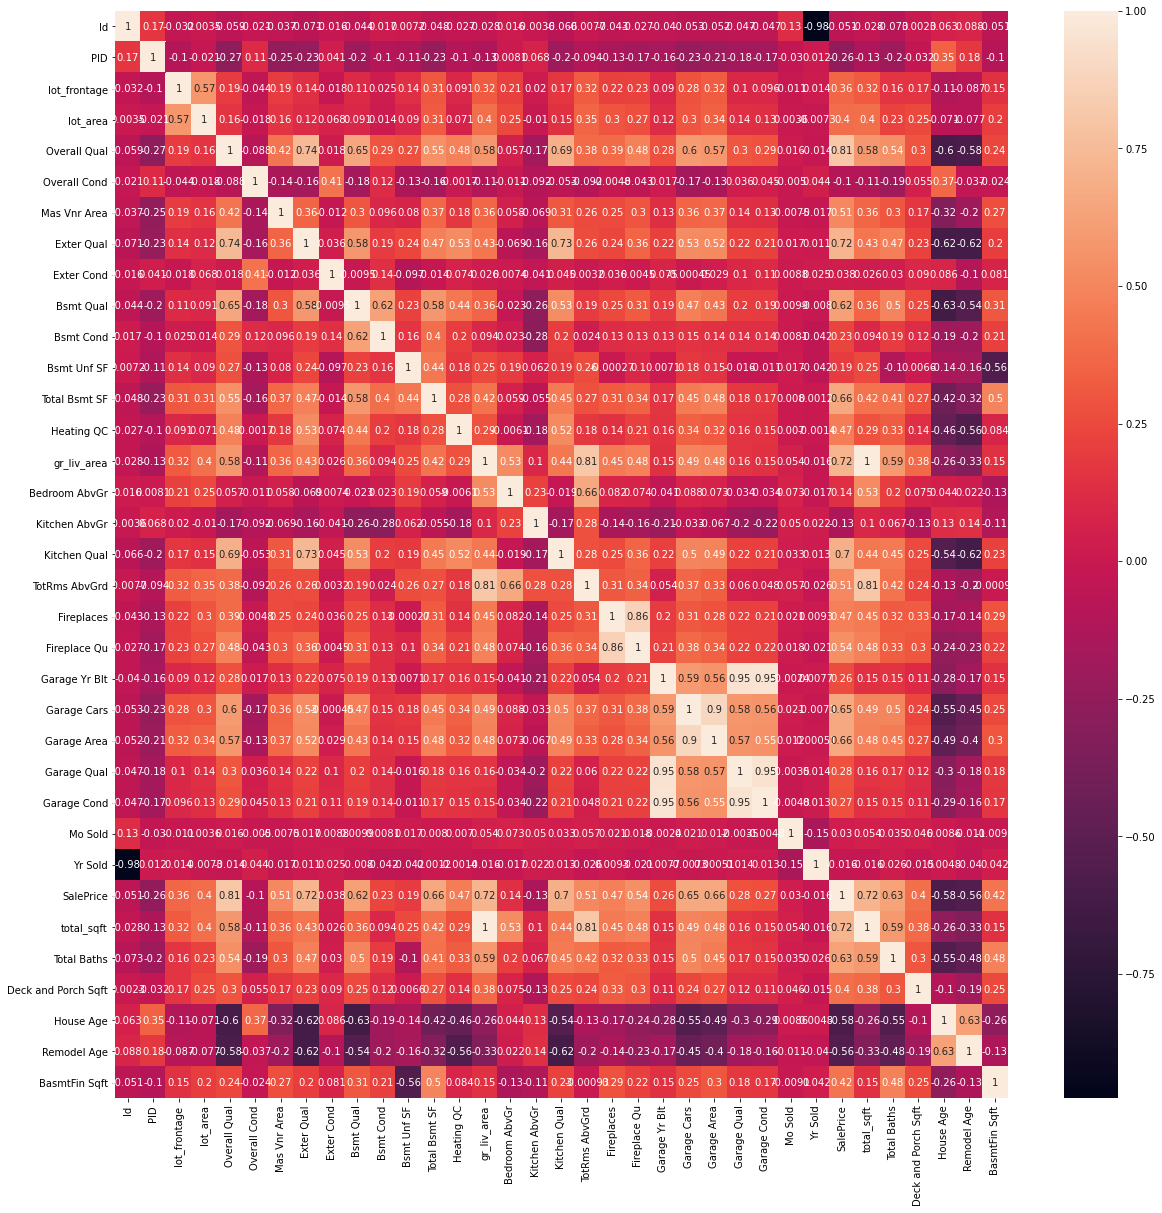

In [42]:
plt.figure(figsize= (20,20))
sns.heatmap(no_out.corr(), annot=True)

## 8. Creating Dummy Variables where Appropriate

In [44]:
##Creating dummy variables.
no_out_dummies = pd.get_dummies(no_out, columns=['MS Zoning', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'House Style', 'Bldg Type', 'Roof Style', 'Central Air'], drop_first = True)

In [45]:
no_out_dummies.shape

(2026, 118)

In [46]:
##exporting the cleaned training data to CSV
no_out_dummies.to_csv('./datasets/train_clean.csv', index=False)

## 9. A Final Correlation Heatmap

In [49]:
## https://www.geeksforgeeks.org/python-pandas-dataframe-corrwith/ 
corr_SP_3 = no_out_dummies.corrwith(no_out_dummies['SalePrice'])

corr_SP_3 = pd.DataFrame(corr_SP_3.sort_values(0))

sns.set(font_scale=3)
plt.figure(figsize= (20,30))
sns.heatmap(corr_SP_3.tail(40), cmap = 'YlGnBu', annot=True)

# Summary of Notebook 1

In this notebook I have cleaned and explored the data from the housing market data csv file. This has included taking care of null values, generating new features, correcting for outliers, converting to ordinal and dummifying relevant columns. With the data cleaned and some clear steps forward given the correlation map, we had over to Notebook 3 to begin modeling. 

NB - Notebook 2 is a stripped down version of this notebook designed to transform the 'test' data in the same way that the training data has been changed in this notebook. It will likely not be of much interest to most readers.